Batch Normalization technique is used to resolve the problem cause by vanishing gradient and exploding gradient issue.

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [6]:
%load_ext tensorboard

In [3]:

(X_train_full,y_train_full),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
X_train_full=X_train_full/255.0
X_test=X_test/255.0


In [5]:
X_valid,X_train=X_train_full[:5000],X_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [7]:
tf.random.set_seed(42)
np.random.seed(42)

In [9]:
LAYERS=[
tf.keras.layers.Flatten(input_shape=[28,28]),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10,activation="softmax"),

]

In [10]:
model=tf.keras.models.Sequential(LAYERS)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

## Without Batch Normlization

In [13]:
LOSS="sparse_categorical_crossentropy"
OPTIMIZER=tf.keras.optimizers.SGD(lr=1e-3)
METRICS=["accuracy"]

In [14]:
model.compile(loss=LOSS,
              optimizer=OPTIMIZER,
              metrics=METRICS)
                  

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
__________________________________________________

In [16]:
EPOCHS=10

In [17]:
history=model.fit(X_train,y_train,epochs=EPOCHS,
                  validation_data=(X_valid,y_valid),
                  verbose=2)
                  

Epoch 1/10
1719/1719 - 2s - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 - 2s - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 - 1s - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7896
Epoch 4/10
1719/1719 - 1s - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 - 1s - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 - 1s - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 - 1s - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy: 0.8304
Epoch 8/10
1719/1719 - 2s - loss: 0.5172 - accuracy: 0.8273 - val_loss: 0.5079 - val_accuracy: 0.8284
Epoch 9/10
1719/1719 - 1s - loss: 0.5040 - accuracy: 0.8288 - val_loss: 0.4895 - val_accuracy: 0.8390
Epoch 10/10
1719/1719 - 1s - loss: 0.4924 - accuracy: 0.8321 - val_loss: 0.4817 - 

<Figure size 640x480 with 0 Axes>

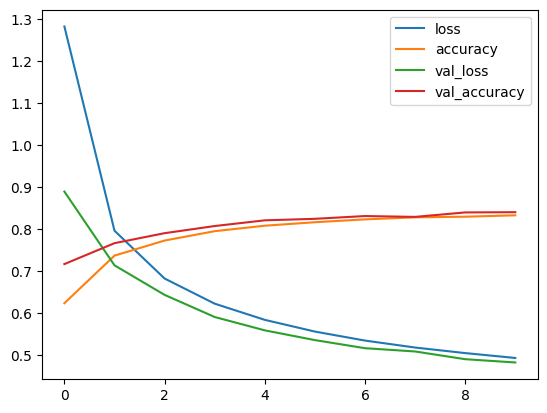

In [20]:
plt.clf()
pd.DataFrame(history.history).plot()
plt.show()

## Apply batch Normalization and see the result

In [21]:
del model

In [23]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")
]

In [24]:
model=tf.keras.models.Sequential(LAYERS)

In [25]:
LOSS

'sparse_categorical_crossentropy'

In [26]:
model.compile(
loss=LOSS,
optimizer=tf.keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"]
)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

## Batch normalization paramters

In [34]:
for variables  in model.layers[1].variables:
    print(f"{variables.name} is trainable: {variables.trainable}")

batch_normalization_3/gamma:0 is trainable: True
batch_normalization_3/beta:0 is trainable: True
batch_normalization_3/moving_mean:0 is trainable: False
batch_normalization_3/moving_variance:0 is trainable: False


In [ ]:
model.layers[1].variables

In [36]:
history=model.fit(X_train,y_train,epochs=10,
                 validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8293 - accuracy: 0.7221 - val_loss: 0.5539 - val_accuracy: 0.8160
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5703 - accuracy: 0.8036 - val_loss: 0.4792 - val_accuracy: 0.8380
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5161 - accuracy: 0.8212 - val_loss: 0.4424 - val_accuracy: 0.8492
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4789 - accuracy: 0.8314 - val_loss: 0.4212 - val_accuracy: 0.8564
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4548 - accuracy: 0.8405 - val_loss: 0.4051 - val_accuracy: 0.8614
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4387 - accuracy: 0.8447 - val_loss: 0.3930 - val_accuracy: 0.8630
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4254 - accuracy: 0.8504 - val_loss: 0.3829 - val_accuracy:

In [40]:
!git init

Initialized empty Git repository in C:/Users/anish/Deep Learning/.git/
